In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("Fruit.csv")
df

,x,y,class
0,4.194795,-0.938062,apple
1,8.269129,-4.450061,apple
2,8.451618,3.547347,apple
3,7.127931,-4.404420,apple
4,5.993756,5.669073,apple
...,...,...,...
1495,5.723135,10.423754,orange
1496,5.526111,6.526867,orange
1497,11.748750,10.888969,orange
1498,11.408684,9.115518,orange


In [21]:
df.groupby("class").describe()

x                                                               \
        count      mean       std       min       25%       50%        75%   
class                                                                        
apple   500.0  9.976527  3.499538 -3.169166  7.589449  9.933984  12.349253   
banana  500.0  0.759239  3.373955 -8.670008 -1.596249  0.591713   3.129512   
orange  500.0  9.749801  3.510099 -1.174934  7.357005  9.999254  12.096374   

                       y                                                     \
              max  count      mean       std       min       25%        50%   
class                                                                         
apple   19.139731  500.0  1.053887  3.633456 -9.661589 -1.444258   1.124446   
banana  11.054936  500.0  5.078837  3.555489 -5.265395  2.852170   5.126191   
orange  21.363968  500.0  9.820451  3.628288 -4.383201  7.593334  10.113704   

                              
              75%        max  
class                         
apple    3.571604  12.597467  
banana   7.507274  15.409916  
orange  11.923680  22.451916

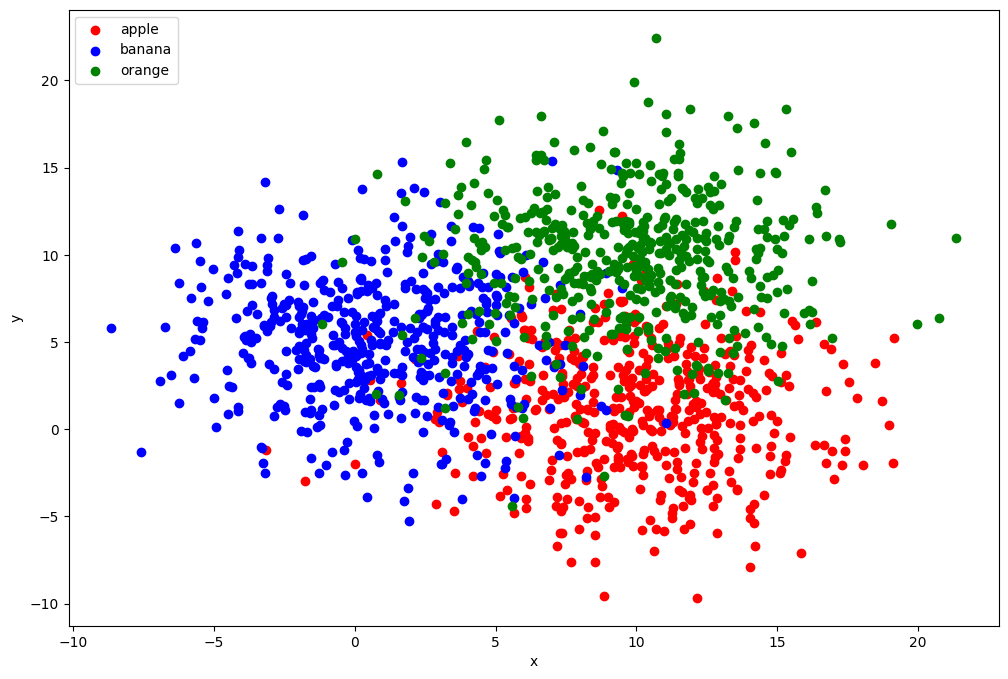

In [22]:
color = ['red','blue','green']
types = df['class'].unique()
f = plt.figure(figsize=(12,8))
for i in range(0,3):
    plt.scatter(df.loc[df['class'] == types[i], 'x'],df.loc[df['class'] == types[i], 'y'], c=color[i], label=types[i])
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='upper left')
plt.show()

In [23]:
# Split features and label
X = df.drop("class",axis=1)
y = df['class']
np.unique(y)

array(['apple', 'banana', 'orange'], dtype=object)

In [24]:
# Encode label
le = LabelEncoder()
y_encoded = le.fit_transform(y)
np.unique(y_encoded)

array([0, 1, 2])

In [25]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y_encoded,
                                                 train_size=0.8,
                                                 shuffle=True,
                                                 stratify=y_encoded)

In [26]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [27]:
train = np.empty((X_train_scaled.shape[0],3))
for i in range(X_train_scaled.shape[0]):
    train[i,0] = X_train_scaled[i,0]
    train[i,1] = X_train_scaled[i,1]
    train[i,2] = y_train[i]

In [28]:
test = np.empty((X_test_scaled.shape[0],3))
for i in range(X_test_scaled.shape[0]):
    test[i,0] = X_test_scaled[i,0]
    test[i,1] = X_test_scaled[i,1]
    test[i,2] = y_test[i]


## KNN algorithm
1. Calculate Euclidean Distance
2. Store the distance in an array and sort it in ascending order
3. Select the first K elements in the sorted list
4. Perform the majority Voting and get predicted class

In [29]:
# Euclidean Distance
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

def KNN(train,sample,k):
    dist = []
    # Calculate Euclidean distance
    for t in train:
        d = distance(t,sample)
        dist.append((t,d))
    # Sort the list in ascending order
    dist.sort(key=lambda m: m[1])

    # Get K nearest neighbors
    neighbors = []
    for i in range(k):
        neighbors.append(dist[i][0])
    return neighbors

def get_majority(train, sample, k):
    neighbors = KNN(train,sample,k)
    # make label unique
    labels = [n[-1] for n in neighbors]
    pred = max(set(labels),key=labels.count)
    return pred    

## Model Testing & Evaluation

In [30]:
pred = get_majority(train,test[120],20)
print('True class is %d, Predicted class is %d' % (test[120][-1], pred))

True class is 1, Predicted class is 1


In [31]:
test_pred = np.empty((len(test),))
for i in range(len(test)):
    test_pred[i] = get_majority(train,test[i],300)
    print('True class is %d, Predicted class is %d' % (test[i][-1], test_pred[i]))

True class is 2, Predicted class is 2
True class is 2, Predicted class is 2
True class is 0, Predicted class is 0
True class is 0, Predicted class is 0
True class is 1, Predicted class is 1
True class is 2, Predicted class is 2
True class is 2, Predicted class is 2
True class is 2, Predicted class is 2
True class is 0, Predicted class is 0
True class is 2, Predicted class is 2
True class is 1, Predicted class is 1
True class is 2, Predicted class is 2
True class is 1, Predicted class is 1
True class is 2, Predicted class is 2
True class is 2, Predicted class is 2
True class is 2, Predicted class is 2
True class is 0, Predicted class is 0
True class is 2, Predicted class is 2
True class is 2, Predicted class is 2
True class is 2, Predicted class is 2
True class is 2, Predicted class is 2
True class is 1, Predicted class is 1
True class is 0, Predicted class is 0
True class is 1, Predicted class is 1
True class is 2, Predicted class is 2
True class is 0, Predicted class is 0
True class i

In [32]:
def accuracy(test,test_pred):
    corr = 0
    for i in range(test_pred.shape[0]):
        if test[i][-1] == test_pred[i]:
            corr = corr + 1
    return round((corr / float(len(test_pred))),4)

In [33]:
acc = accuracy(test,test_pred)
acc

1.0

## Explore the optimal K value
The results showed that when K is less than 750, the classifier can correctly classify all the test data.

In [34]:
acc_k = []
for k in range(5,1006,50):
    for i in range(len(test)):
        test_pred[i] = get_majority(train,test[i],k)
    acc = accuracy(test,test_pred)
    acc_k.append(acc)

In [35]:
default_x_ticks = range(len(acc_k))
x = []
for i in default_x_ticks:
    n = 50*i+5
    x.append(n)

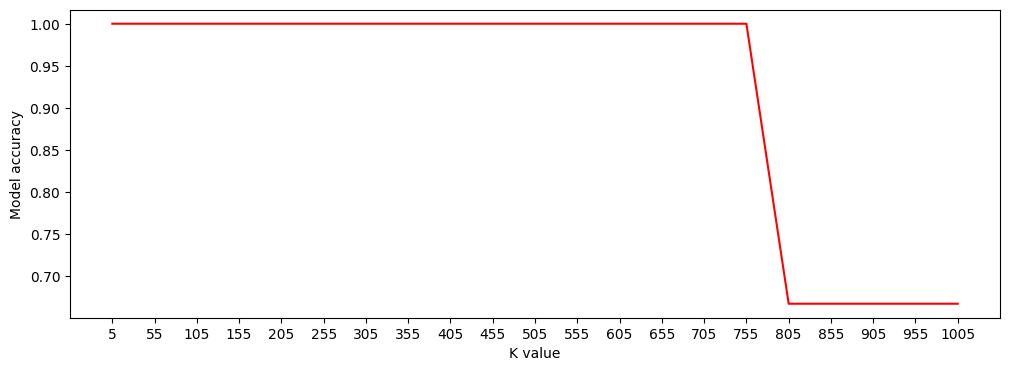

In [36]:

f = plt.figure(figsize=(12,4))
plt.plot(acc_k,color = 'r')
plt.xticks(default_x_ticks, x)
plt.xlabel("K value")
plt.ylabel("Model accuracy")
plt.show()